In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

airline = pd.read_csv('airline_dataset_v2.csv')
print(airline.head())

  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   

In [3]:
#Check for missing data
print(airline.isnull().sum())
print(airline.dtypes)

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64
Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object


In [4]:
print(airline.describe(include='all'))

       Passenger ID First Name Last Name Gender           Age Nationality  \
count         98619      98619     98619  98619  98619.000000       98619   
unique        98619       8437     41658      2           NaN         240   
top          ABVWIg       Gale    Dyball   Male           NaN       China   
freq              1         37        17  49598           NaN       18317   
mean            NaN        NaN       NaN    NaN     45.504021         NaN   
std             NaN        NaN       NaN    NaN     25.929849         NaN   
min             NaN        NaN       NaN    NaN      1.000000         NaN   
25%             NaN        NaN       NaN    NaN     23.000000         NaN   
50%             NaN        NaN       NaN    NaN     46.000000         NaN   
75%             NaN        NaN       NaN    NaN     68.000000         NaN   
max             NaN        NaN       NaN    NaN     90.000000         NaN   

             Airport Name Airport Country Code   Country Name  \
count     

In [5]:
print(airline.columns)

airline_col = ['Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport', 'Pilot Name', 'Flight Status']

for col in airline_col:
    if airline[col].dtype == 'object':
        airline[col] = airline[col].astype('category')
        
print(airline.dtypes)


Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')
Passenger ID              object
First Name                object
Last Name                 object
Gender                  category
Age                        int64
Nationality             category
Airport Name            category
Airport Country Code    category
Country Name            category
Airport Continent       category
Continents              category
Departure Date          category
Arrival Airport         category
Pilot Name              category
Flight Status           category
dtype: object


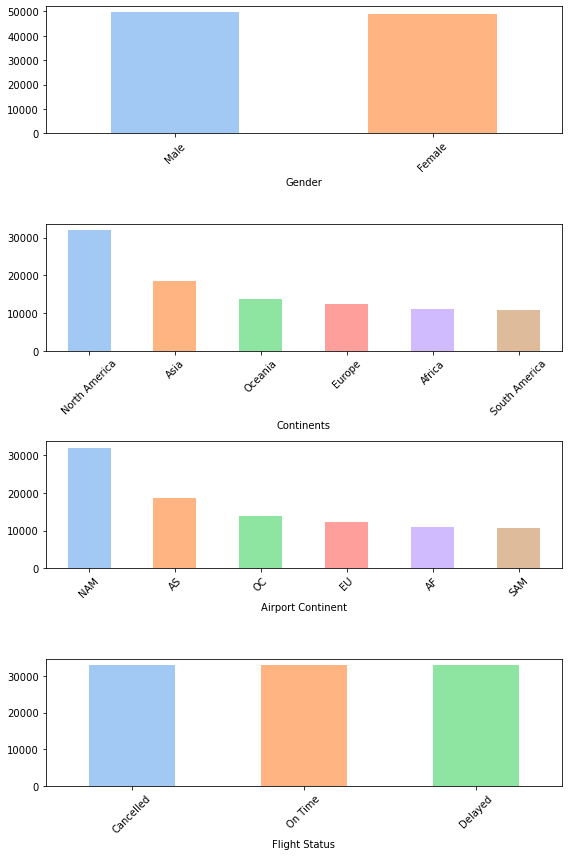

In [6]:
airline_cat = ['Gender', 'Continents', 'Airport Continent', 'Flight Status']

fig, axes = plt.subplots(len(airline_cat), 1, figsize=(8, 12))
palette = sns.color_palette('pastel')
for i, col in enumerate(airline_cat):
    col_counts = airline[col].value_counts()
    col_counts.plot(kind='bar', ax=axes[i], color=palette)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)   
plt.tight_layout()
plt.show()

In [7]:
print(airline['Departure Date'])

#The dates are not recorded in the same way.Let's correct this.
airline['Departure Date'] = airline['Departure Date'].astype('string')
print(airline['Departure Date'].dtype)

airline['Departure Date'] = airline['Departure Date'].str.replace('/', '-')
print(airline['Departure Date'])



0         6/28/2022
1        12/26/2022
2         1/18/2022
3         9/16/2022
4         2/25/2022
            ...    
98614    12-11-2022
98615    10/30/2022
98616    09-10-2022
98617    10/26/2022
98618     4/16/2022
Name: Departure Date, Length: 98619, dtype: category
Categories (364, object): ['01-01-2022', '01-02-2022', '01-03-2022', '01-04-2022', ..., '9/27/2022', '9/28/2022', '9/29/2022', '9/30/2022']
string
0         6-28-2022
1        12-26-2022
2         1-18-2022
3         9-16-2022
4         2-25-2022
            ...    
98614    12-11-2022
98615    10-30-2022
98616    09-10-2022
98617    10-26-2022
98618     4-16-2022
Name: Departure Date, Length: 98619, dtype: string


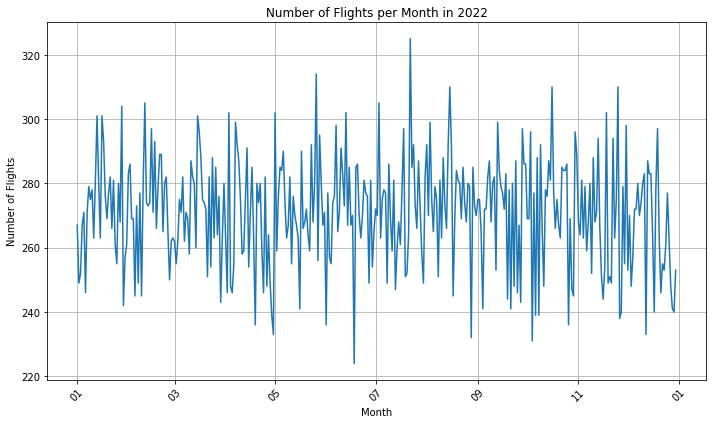

In [8]:
airline['Departure Date'] = pd.to_datetime(airline['Departure Date'])
flights = airline['Departure Date'].value_counts().sort_index()  # Sort by date

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(flights.index, flights.values)
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month in 2022')

# Format the x-axis to display dates nicely
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))  # Adjust the date format as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add gridlines if desired

plt.tight_layout()
plt.show()

   Airport Continent  Month  Count
0                 AF      1    967
1                 AF      2    827
2                 AF      3    932
3                 AF      4    886
4                 AF      5    934
..               ...    ...    ...
67               SAM      8    960
68               SAM      9    873
69               SAM     10    907
70               SAM     11    870
71               SAM     12    893

[72 rows x 3 columns]


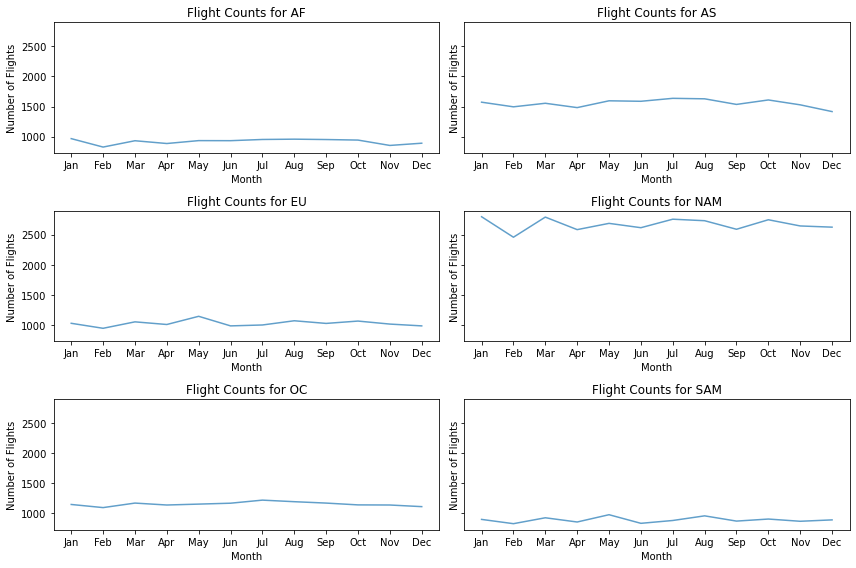

In [9]:
airline['Month'] = airline['Departure Date'].dt.month
monthly_flights = airline[['Airport Continent', 'Month']]

flights = monthly_flights.groupby(['Airport Continent', 'Month']).size().reset_index(name='Count')
print(flights)

# Get a list of unique airport continents (countries)
continents = flights['Airport Continent'].unique()

# Set the number of rows and columns for subplots
num_rows = len(continents) // 2  # Assuming 2 columns
num_cols = 2  # You can adjust the number of columns as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharey=True)

# Iterate through countries and create subplots
for i, continent in enumerate(continents):
    row = i // num_cols
    col = i % num_cols
    continent_data = flights[flights['Airport Continent'] == continent]
    ax = axes[row, col]
    ax.plot(continent_data['Month'], continent_data['Count'], alpha=0.7)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Flights')
    ax.set_title(f'Flight Counts for {continent}')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(continent_data['Month'])
    ax.set_xticklabels(month_names)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Airport Continent  98619 non-null  category
 1   Month              98619 non-null  int64   
dtypes: category(1), int64(1)
memory usage: 867.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Airport Continent  98619 non-null  category
 1   Month              98619 non-null  int64   
 2   Status             98619 non-null  category
dtypes: category(2), int64(1)
memory usage: 963.5 KB
None
    Airport Continent  Month     Status  Count
0                  AF      1  Cancelled    307
1                  AF      1    Delayed    328
2                  AF      1    On Time    332
3                  AF      2  Cancelled

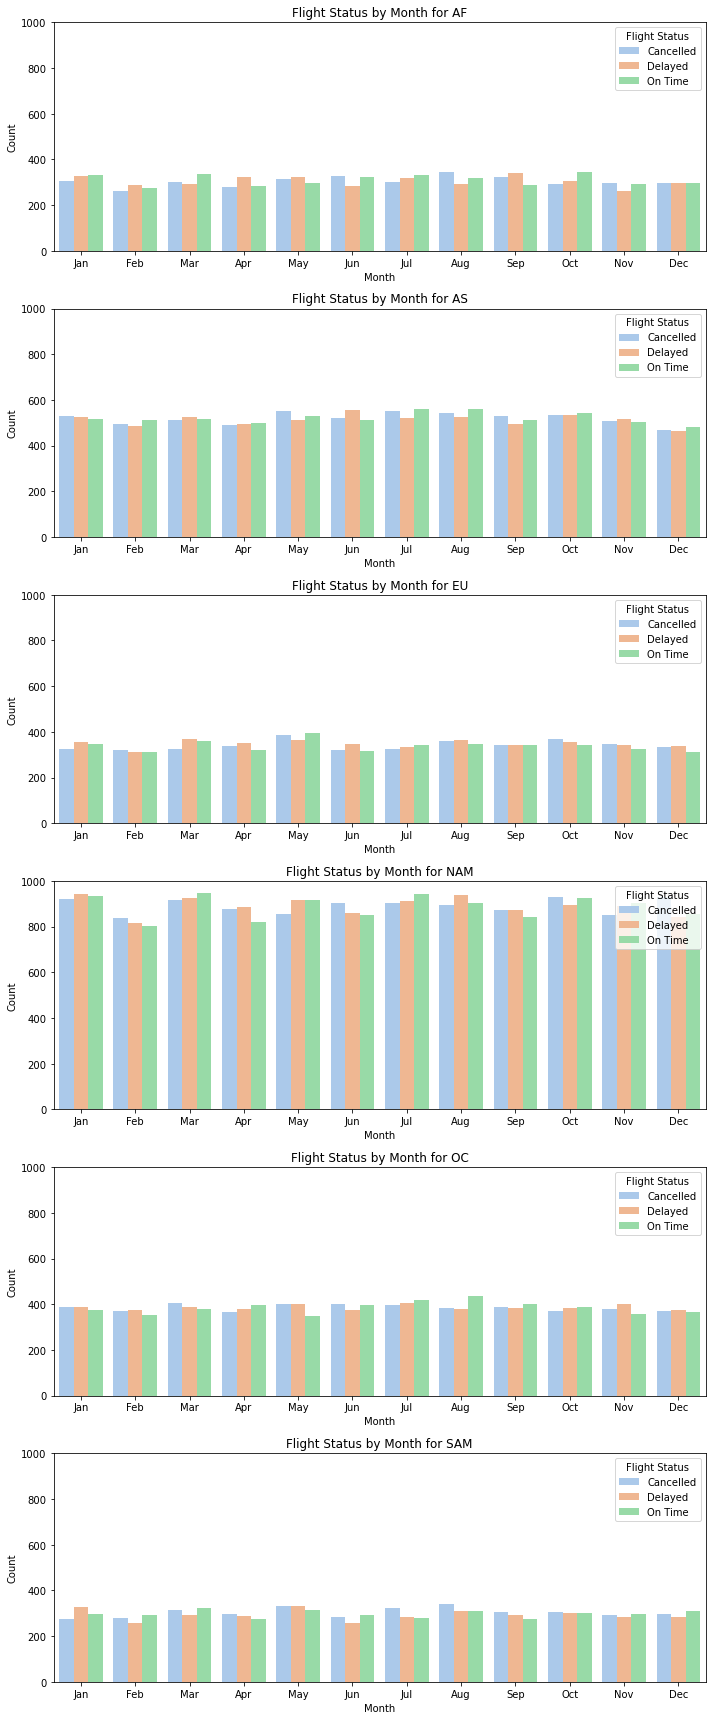

In [14]:
monthly_flights = airline[['Airport Continent', 'Month']]
print(monthly_flights.info())
monthly_flights = monthly_flights.assign(Status=airline['Flight Status'])
print(monthly_flights.info())

flights = monthly_flights.groupby(['Airport Continent', 'Month', 'Status']).size().reset_index(name='Count')
print(flights)

# Set up the subplots
num_rows = len(continents)
fig, axes = plt.subplots(num_rows, 1, figsize=(10, 4*num_rows))
pastel_palette = sns.color_palette("pastel")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, continent in enumerate(continents):
    ax = axes[i]
    data = flights[flights['Airport Continent'] == continent]
    sns.barplot(data=data, x='Month', y='Count', hue='Status', ax=axes[i], palette=pastel_palette)
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    #ax.set_xticks(continent_data['Month'])
    ax.set_xticklabels(month_names)
    ax.set_title(f'Flight Status by Month for {continent}')
    ax.legend(title='Flight Status')
    ax.set_ylim(0, 1000)
    
    # Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
#Further data needs to be collected to understand why flights are cancelled/delayed in order to improve overall performances